Practical 6

In [2]:
# Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the
# performance of clusters by changing the parameters involved in the algorithms

In [55]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
iris = load_iris()

# Convert the data to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(iris_df)
y = iris.target

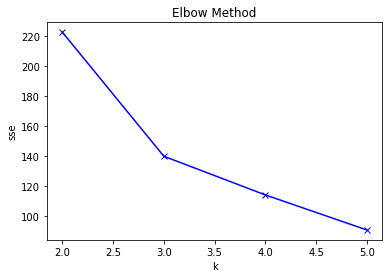

In [26]:
from sklearn.cluster import KMeans

#Define range of k values to test
k_values = range(2,6)

#Calculate sse to each values of k
sse_values = []
for k in k_values :
        kmeans = KMeans(n_clusters = k,random_state = 42)
        kmeans.fit(X)
        sse = kmeans.inertia_
        sse_values.append(sse)
#Plot sse values against k
plt.plot(k_values,sse_values,'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Method')
plt.show()



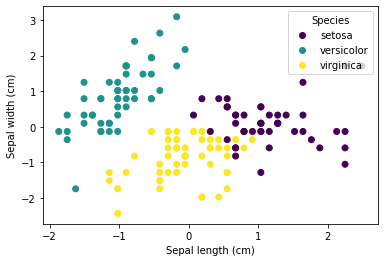

K-means with k= 3 clusters has sum squared error(sse) score: 139.8204963597498
K-means with k=3 has silhouette score: 0.45994823920518635


In [52]:
#Plot kmeans clustes for k = 3
kmeans = KMeans(n_clusters=3,random_state = 42)
kmeans.fit(X)



# Plot the results
fig, ax = plt.subplots()
scatter = ax.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')

# Add legend
handles, labels = scatter.legend_elements()
legend = ax.legend(handles, iris.target_names, loc="upper right", title="Species")
plt.show()

#sse for kmeans clustering with k = 3
kmeans_sse = kmeans.inertia_
print(f"K-means with k= 3 clusters has sum squared error(sse) score: {kmeans_sse}")

#silhouette score for kmeans clustering with k =3
kmeans_silh = silhouette_score(X,kmeans.labels_)
print(f"K-means with k={3} has silhouette score: {kmeans_silh}")

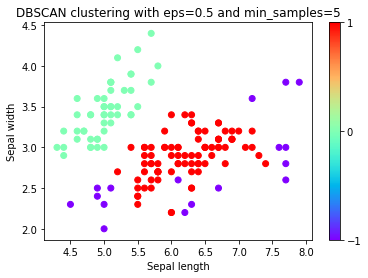

In [15]:
# Apply DBSCAN clustering with eps=0.5 and min_samples=5
eps = 0.5
dbscan = DBSCAN(eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results with legend
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('DBSCAN clustering with eps=0.5 and min_samples=5')
plt.colorbar(ticks=range(-1, 4))
plt.show()


In [16]:
#silhouette score for db scan with eps = 0.5
score_db = silhouette_score(X, dbscan_labels)
print(f"DBSCAN with eps={eps} has silhouette score: {score_db}")

DBSCAN with eps=0.5 has silhouette score: 0.4860341970345682


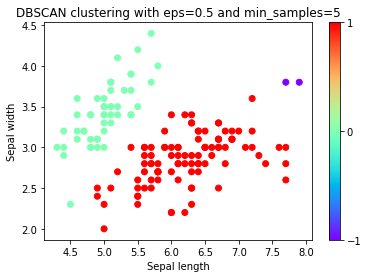

In [19]:
# Apply DBSCAN clustering with eps=0.8 and min_samples=6
eps = 0.8
dbscan = DBSCAN(eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot the results with legend
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap='rainbow')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('DBSCAN clustering with eps=0.5 and min_samples=5')
plt.colorbar(ticks=range(-1, 4))
plt.show()


In [20]:
#silhouette score for db scan with eps = 0.8
score_db = silhouette_score(X, dbscan_labels)
print(f"DBSCAN with eps={eps} has silhouette score: {score_db}")

DBSCAN with eps=0.8 has silhouette score: 0.5121107753649302


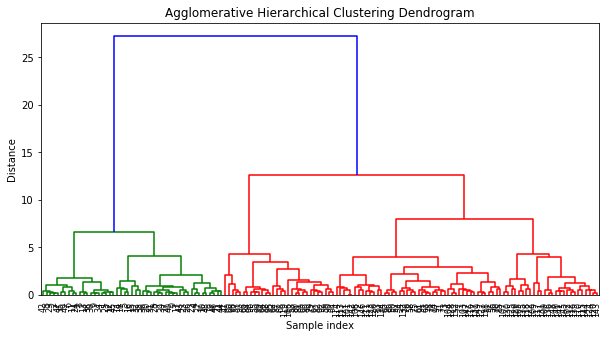

Hierarchical Clustering with Ward linkage has silhouette score: 0.446689041028591


In [68]:
from sklearn.cluster import AgglomerativeClustering

# Apply agglomerative hierarchical clustering with Ward's linkage
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# Calculate Silhouette Score
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
print(f"Hierarchical Clustering with Ward linkage has silhouette score: {score}")

In [70]:
# Apply agglomerative hierarchical clustering with average linkage 
Z = linkage(X, method='average')

# Calculate Silhouette Score
model = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
print(f"Hierarchical Clustering with average linkage has silhouette score: {score}")

Hierarchical Clustering with average linkage has silhouette score: 0.4802669329728698


In [63]:
# Apply agglomerative hierarchical clustering with complete linkage 
Z = linkage(X, method='complete')

# Calculate Silhouette Score
model = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = model.fit_predict(X)
score = silhouette_score(X, labels)
print(f"Hierarchical Clustering with complete linkage has silhouette score: {score}")

Hierarchical Clustering with complete linkage has silhouette score: 0.44961848359884715
